In [71]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [72]:
df = pd.read_csv("master_genre.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,energy,Performer_left,valence,time_signature,instrumentalness,tempo,Song_left,SongID,danceability,speechiness,acousticness,liveness,spotify_track_duration_ms,key,Genre,mode,loudness
0,0,0,0.588,Tones And I,0.513,4.0,0.000104,98.027,Dance Monkey,Dance MonkeyTones And I,0.824,0.0924,0.692,0.1490,209438.0,6.0,pop,0.0,-6.400
1,1,2,0.762,Post Malone,0.553,4.0,0.002440,120.042,Circles,CirclesPost Malone,0.695,0.0395,0.192,0.0863,215280.0,0.0,pop,1.0,-3.497
2,2,3,0.320,Maroon 5,0.575,4.0,0.000000,91.019,Memories,MemoriesMaroon 5,0.764,0.0546,0.837,0.0822,189486.0,11.0,pop,1.0,-7.209
3,3,4,0.225,Billie Eilish,0.243,4.0,0.657000,120.006,everything i wanted,everything i wantedBillie Eilish,0.704,0.0994,0.902,0.1060,245425.0,6.0,pop,0.0,-14.454
4,4,5,0.625,Mariah Carey,0.346,4.0,0.000000,150.277,All I Want For Christmas Is You,All I Want For Christmas Is YouMariah Carey,0.335,0.0386,0.164,0.0708,241106.0,7.0,pop,1.0,-7.462


In [73]:
y = df["Genre"]
y.head()

0    pop
1    pop
2    pop
3    pop
4    pop
Name: Genre, dtype: object

In [75]:
X = df.drop(columns = ['Performer_left', 'Unnamed: 0', 'Unnamed: 0.1', 'Song_left', 'SongID', 'Genre'])
X.head()

,energy,valence,time_signature,instrumentalness,tempo,danceability,speechiness,acousticness,liveness,spotify_track_duration_ms,key,mode,loudness
0,0.588,0.513,4.0,0.000104,98.027,0.824,0.0924,0.692,0.1490,209438.0,6.0,0.0,-6.400
1,0.762,0.553,4.0,0.002440,120.042,0.695,0.0395,0.192,0.0863,215280.0,0.0,1.0,-3.497
2,0.320,0.575,4.0,0.000000,91.019,0.764,0.0546,0.837,0.0822,189486.0,11.0,1.0,-7.209
3,0.225,0.243,4.0,0.657000,120.006,0.704,0.0994,0.902,0.1060,245425.0,6.0,0.0,-14.454
4,0.625,0.346,4.0,0.000000,150.277,0.335,0.0386,0.164,0.0708,241106.0,7.0,1.0,-7.462


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.697/0.106
k: 3, Train/Test Score: 0.454/0.132
k: 5, Train/Test Score: 0.422/0.185
k: 7, Train/Test Score: 0.394/0.196
k: 9, Train/Test Score: 0.382/0.214
k: 11, Train/Test Score: 0.377/0.231
k: 13, Train/Test Score: 0.361/0.238
k: 15, Train/Test Score: 0.363/0.253
k: 17, Train/Test Score: 0.353/0.263
k: 19, Train/Test Score: 0.348/0.272
k: 21, Train/Test Score: 0.349/0.287
k: 23, Train/Test Score: 0.342/0.283
k: 25, Train/Test Score: 0.338/0.289
k: 27, Train/Test Score: 0.337/0.283
k: 29, Train/Test Score: 0.332/0.293
k: 31, Train/Test Score: 0.332/0.302
k: 33, Train/Test Score: 0.330/0.308
k: 35, Train/Test Score: 0.329/0.315
k: 37, Train/Test Score: 0.330/0.321
k: 39, Train/Test Score: 0.329/0.308


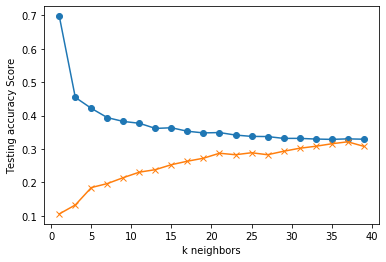

In [80]:
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
print('k=29 Test Acc: %.3f' % knn.score(X_test, y_test))

pred =knn.predict(X_test)

In [81]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
print('k=29 Test Acc: %.3f' % knn.score(X_test, y_test))

k=29 Test Acc: 0.293


In [37]:
pred =knn.predict(X_test)

In [44]:
pred

array(['rock', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop', 'rock',
       'pop', 'rock', 'rock', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'rock', 'rnb', 'pop', 'rock', 'pop', 'pop', 'rock',
       'pop', 'pop', 'alternative', 'rock', 'pop', 'pop', 'pop', 'rock',
       'pop', 'pop', 'hip hop', 'pop', 'pop', 'pop', 'alternative', 'pop',
       'pop', 'pop', 'rock', 'rock', 'pop', 'pop', 'pop', 'rock', 'pop',
       'pop', 'pop', 'pop', 'rock', 'rock', 'pop', 'pop', 'pop', 'pop',
       'pop', 'rock', 'rock', 'pop', 'pop', 'pop', 'pop', 'rock', 'pop',
       'pop', 'pop', 'rock', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'alternative', 'pop', 'pop', 'hip hop', 'pop',
       'rock', 'pop', 'rnb', 'pop', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'pop', 'pop', 'pop', 'pop', 'rock', 'rock', 'pop', 'pop',
       'pop', 'pop', 'pop', 'rnb', 'pop', 'pop', 'pop', 'pop', 'pop',
       'pop', 'alternative', 'pop', 'rock', 'pop', 'pop', 